# **1. Perkenalan Dataset**


# **Adult Dataset (UCI Machine Learning Repository)**

## Dataset bertipe klasifikasi yang memprediksi apakah pendapatan tahunan seseorang **lebih dari $50K USD atau tidak,** berdasarkan informasi demografis dan pekerjaan mereka. Berikut fiturnya.

## **Target**
**income:** label biner — apakah pendapatan orang tersebut <=50K atau >50K per tahun.

## **Input**
**age:**
Variabel age menunjukkan usia individu dalam satuan tahun dan bertipe data numerik (integer). Variabel ini tidak memiliki nilai yang hilang (missing values).

**workclass:**
Variabel workclass merepresentasikan jenis atau kelas pekerjaan individu, seperti Private, Self-emp-not-inc, Federal-gov, hingga Never-worked. Variabel ini bersifat kategorikal dan memiliki beberapa nilai yang hilang.

**fnlwgt:**
Variabel fnlwgt (final weight) adalah bobot yang diberikan oleh Biro Sensus Amerika Serikat untuk merepresentasikan jumlah individu di populasi yang diwakili oleh satu baris data. Variabel ini bertipe numerik dan tidak memiliki nilai hilang.

**education:**
Variabel education menggambarkan tingkat pendidikan tertinggi yang telah dicapai individu, seperti Bachelors, HS-grad, Masters, hingga Doctorate. Variabel ini bersifat kategorikal dan tidak memiliki nilai yang hilang.

**education-num:**
Variabel education-num merupakan representasi numerik dari tingkat pendidikan individu, yang menunjukkan jumlah tahun pendidikan formal. Variabel ini bertipe integer dan tidak memiliki nilai yang hilang.

**marital-status:**
Variabel marital-status menunjukkan status pernikahan individu, seperti Married-civ-spouse, Never-married, Divorced, dan Widowed. Variabel ini bersifat kategorikal dan tidak memiliki nilai hilang.

**occupation:**
Variabel occupation menggambarkan jenis pekerjaan atau profesi individu, seperti Tech-support, Sales, Exec-managerial, dan Craft-repair. Variabel ini bersifat kategorikal dan memiliki beberapa nilai yang hilang.

**relationship:**
Variabel relationship menunjukkan hubungan individu dengan anggota keluarga dalam rumah tangga, seperti Husband, Wife, Own-child, atau Not-in-family. Variabel ini bersifat kategorikal dan tidak memiliki nilai yang hilang.

**race:**
Variabel race merepresentasikan ras individu, seperti White, Black, Asian-Pac-Islander, dan lainnya. Variabel ini bersifat kategorikal dan tidak memiliki nilai yang hilang.

**sex:**
Variabel sex menunjukkan jenis kelamin individu, yaitu Male atau Female. Variabel ini bersifat biner dan tidak memiliki nilai yang hilang.


# **2. Import Library**

## Library yang digunakan
* **Pandas** digunakan untuk membaca, mengelola, dan menganalisis data dalam bentuk tabel atau *DataFrame*.
* **NumPy** digunakan untuk melakukan komputasi numerik dan operasi matematika pada array berdimensi banyak.
* **Matplotlib** digunakan untuk membuat visualisasi data seperti grafik garis, diagram batang, dan histogram.
* **Seaborn** digunakan untuk membuat visualisasi data statistik dengan tampilan yang lebih informatif dan menarik.


In [88]:
#Type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

# **3. Memuat Dataset**

In [89]:
data_path = "/content/adult_raw.csv"

df = pd.read_csv(data_path)

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [91]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# **4. Exploratory Data Analysis (EDA)**
Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [92]:
print("Jumlah label 'income' (>50K/<=50K):")
display(df['income'].value_counts())

Jumlah label 'income' (>50K/<=50K):


,count
income,
<=50K,24720
>50K,7841


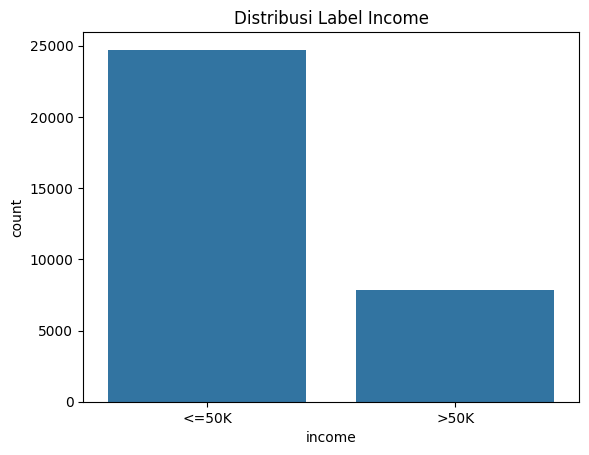

In [93]:
sns.countplot(x="income", data=df)
plt.title("Distribusi Label Income")
plt.show()

## Handling Missing Values (?)

In [94]:
df = df.replace('?', 'Unknown')

In [95]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

## Matriks Korelasi Fitur Numerik

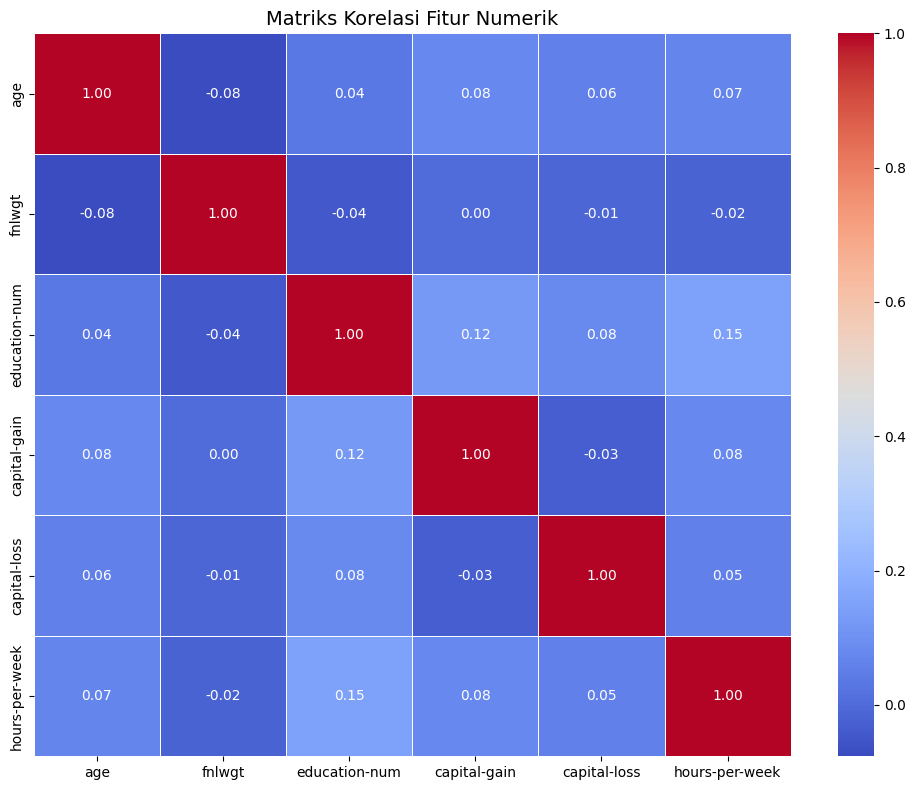

In [96]:
plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriks Korelasi Fitur Numerik", fontsize=14)
plt.tight_layout()
plt.show()

## Distribusi Histogram Fitur Numerik dan Kategorikal

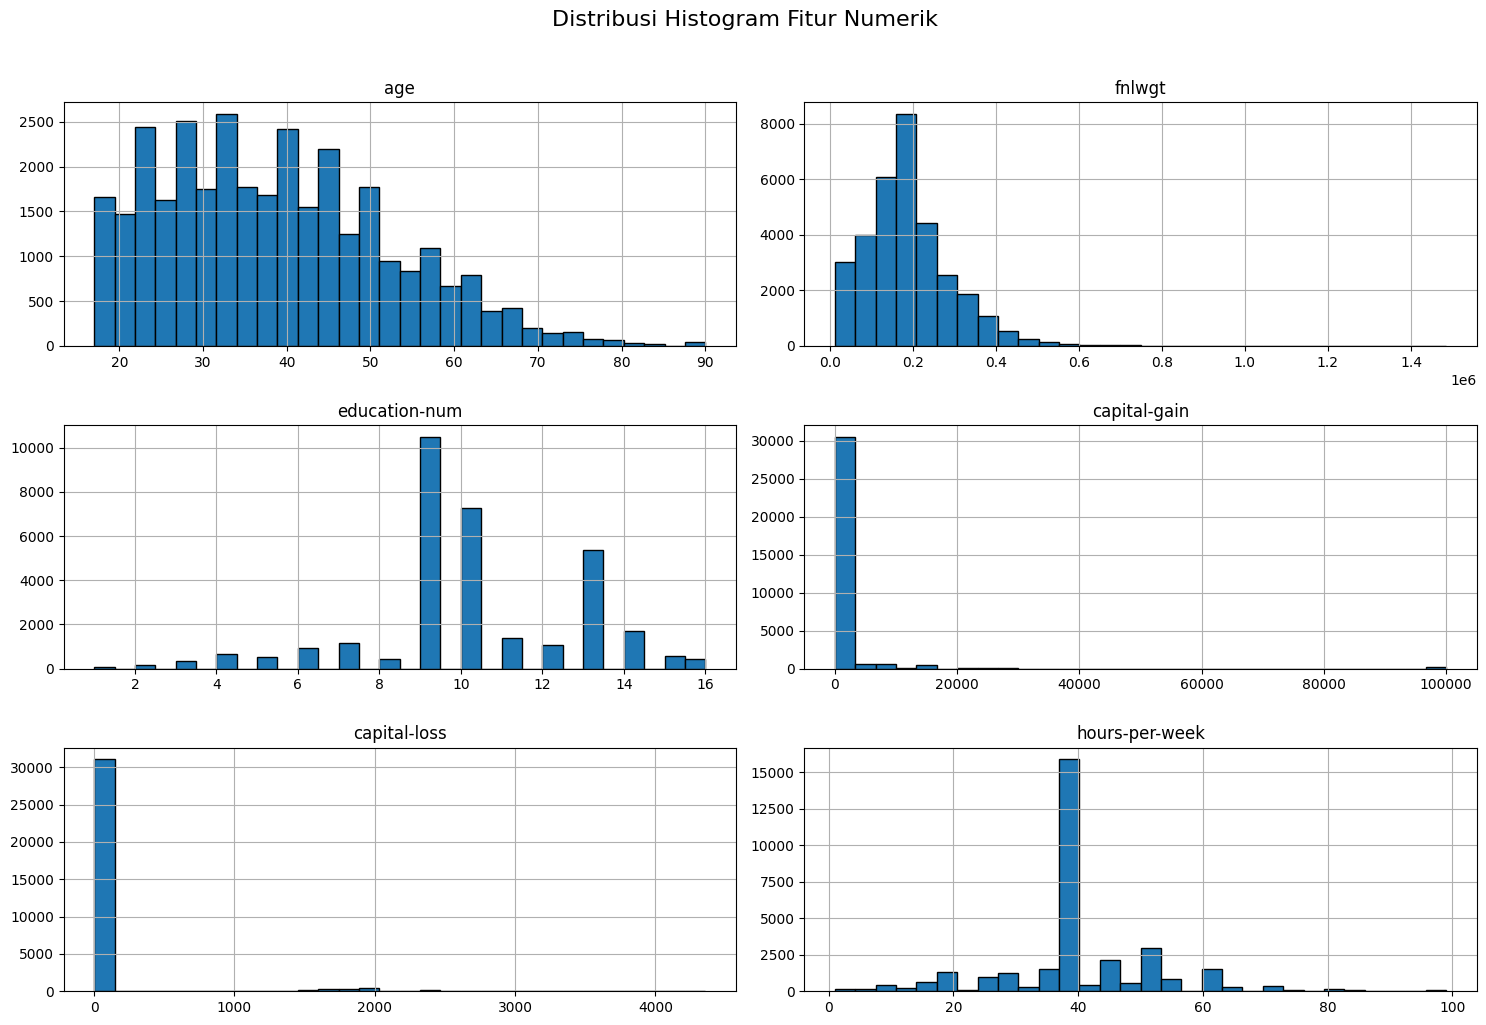

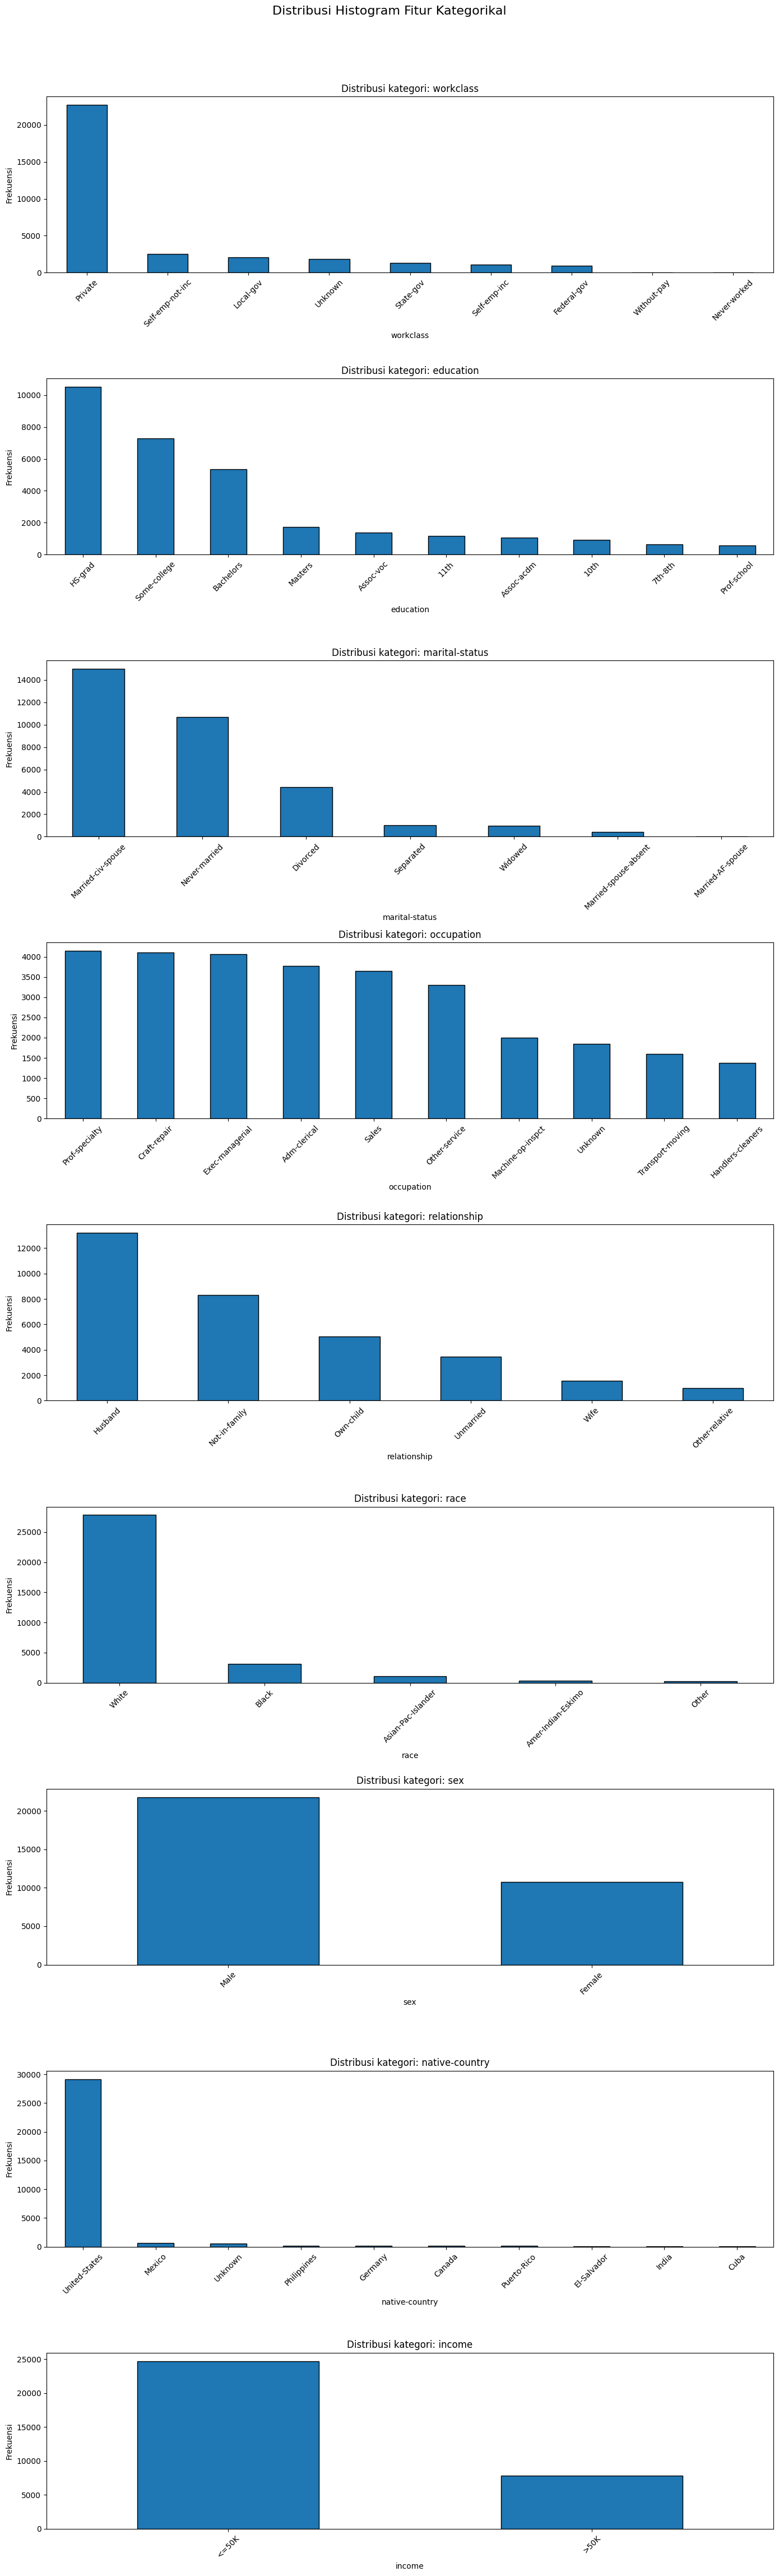

In [97]:
if numeric_cols:
    df[numeric_cols].hist(figsize=(15, 10),bins=30,edgecolor='black')
    plt.suptitle("Distribusi Histogram Fitur Numerik", fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

if cat_cols:
    fig, axes = plt.subplots(len(cat_cols), 1, figsize=(14, 5 * len(cat_cols)))
    if len(cat_cols) == 1:
        axes = [axes]

    for ax, col in zip(axes, cat_cols):
        (df[col].value_counts(dropna=False)
                 .head(10)
                 .plot(kind='bar', ax=ax, edgecolor='black'))
        ax.set_title(f"Distribusi kategori: {col}", fontsize=12)
        ax.set_ylabel("Frekuensi")
        ax.set_xlabel(col)
        ax.tick_params(axis='x', rotation=45)

    fig.suptitle("Distribusi Histogram Fitur Kategorikal", fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

## Pairplot Fitur Numerik

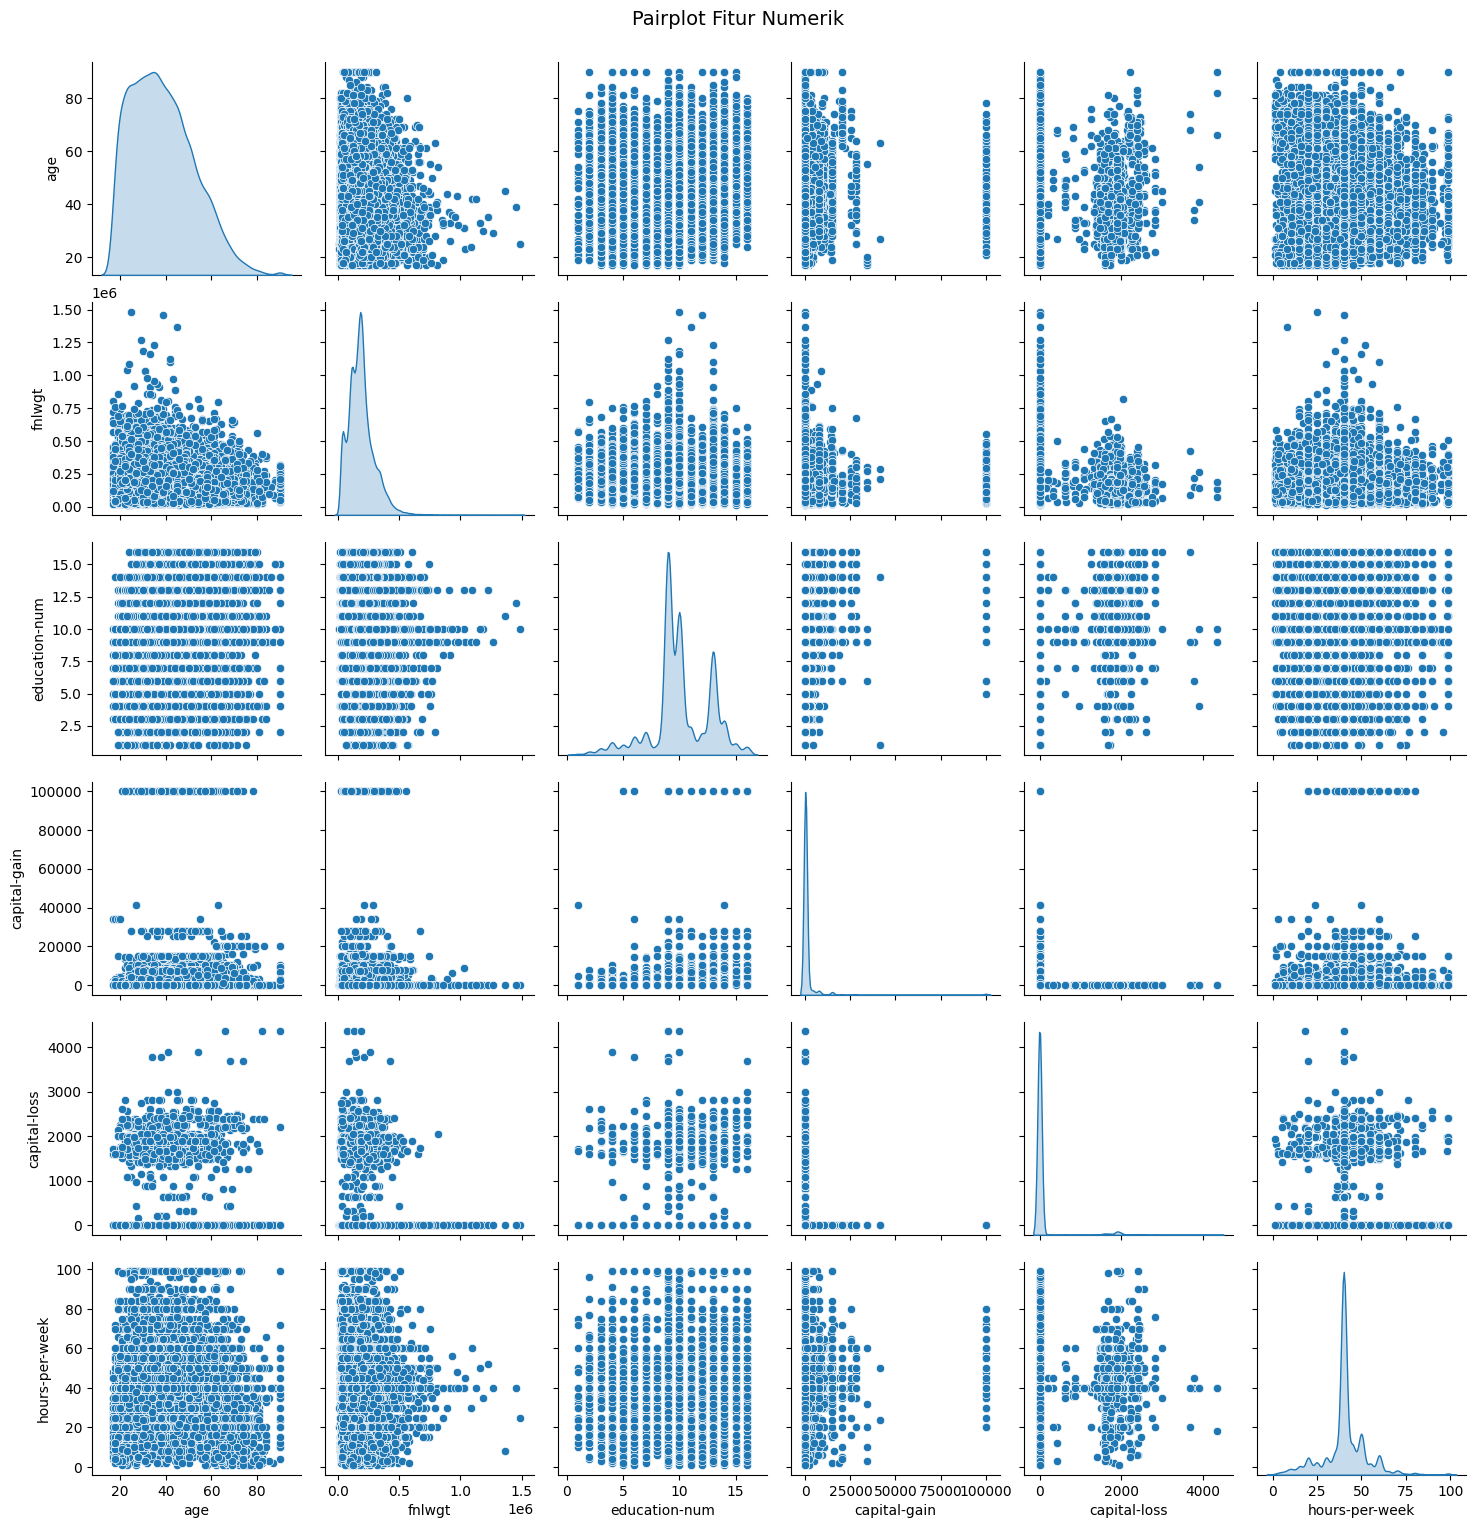

In [98]:
sns.pairplot(df[numeric_cols], diag_kind="kde")
plt.suptitle("Pairplot Fitur Numerik", y=1.02, fontsize=14)
plt.show()

# **5. Data Preprocessing**

## Target Encoding

In [99]:
df["income"] = df["income"].map({">50K": 1, "<=50K": 0})
X_raw = df.drop("income", axis=1).copy()
y = df["income"].copy()

X_raw.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


## Drop fnlwgt/education

In [100]:
X_raw.drop(columns=['fnlwgt', 'education'], inplace=True)
X_raw.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


## Capital Binary

In [101]:
X_raw['capital_gain_binary'] = (X_raw['capital-gain'] > 0).astype(int)
X_raw['capital_loss_binary'] = (X_raw['capital-loss'] > 0).astype(int)
X_raw = X_raw.drop(columns=['capital-gain', 'capital-loss'])
X_raw.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,capital_gain_binary,capital_loss_binary
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,1,0
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0,0
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0,0
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0,0


## Feature Selection & Column Transformer (Encode and Scaling)

In [102]:
numeric_features = ['age', 'education-num', 'hours-per-week', 'capital_gain_binary', 'capital_loss_binary']
categorical_features = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

# Create preprocessing pipelines for numerical and categorical features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ], remainder='drop'
)

# Fit and transform the data
X_processed = preprocessor.fit_transform(X_raw)

# Get feature names after one-hot encoding
cat_feature_names = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)
all_feature_names = numeric_features + list(cat_feature_names)

# Convert the processed array back to a DataFrame
X_processed_df = pd.DataFrame(X_processed, columns=all_feature_names, index=X_raw.index)

X_processed_df.head()

,age,education-num,hours-per-week,capital_gain_binary,capital_loss_binary,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Unknown,native-country_Vietnam,native-country_Yugoslavia
0,0.030671,1.134739,-0.035429,3.317570,-0.22121,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.837109,1.134739,-2.222153,-0.301425,-0.22121,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.042642,-0.420060,-0.035429,-0.301425,-0.22121,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.057047,-1.197459,-0.035429,-0.301425,-0.22121,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.775768,1.134739,-0.035429,-0.301425,-0.22121,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
X_processed_df.head(20)

,age,education-num,hours-per-week,capital_gain_binary,capital_loss_binary,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Unknown,native-country_Vietnam,native-country_Yugoslavia
0,0.030671,1.134739,-0.035429,3.317570,-0.22121,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.837109,1.134739,-2.222153,-0.301425,-0.22121,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.042642,-0.420060,-0.035429,-0.301425,-0.22121,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.057047,-1.197459,-0.035429,-0.301425,-0.22121,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.775768,1.134739,-0.035429,-0.301425,-0.22121,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,-0.115955,1.523438,-0.035429,-0.301425,-0.22121,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,0.763796,-1.974858,-1.979184,-0.301425,-0.22121,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.983734,-0.420060,0.369519,-0.301425,-0.22121,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,-0.555830,1.523438,0.774468,3.317570,-0.22121,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,0.250608,1.134739,-0.035429,3.317570,-0.22121,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [104]:
output_file = "adult_preprocessing.csv"
X_processed_df.to_csv(output_file, index=False)

print(f"Data berhasil disimpan ke {output_file}")

Data berhasil disimpan ke adult_preprocessing.csv
